In [1]:
# importing the data
import pandas as pd

sleep = pd.read_excel("../data/Data_Screen_Time_Behaviour_Caregiver_Perceptions.xlsx")
sleep

,"PARTICIPANT - NOTE DUPLICATES (1ST ROW RAW DATA, 2ND ROW CODED)",Included,ASQ_Included,Duration_Included,Duration (in seconds),Duration_minutes,Duration_categories_1hour,Duration_mins_categories_2hrs,Duration_mins_categories_2.5hrs,Duration_hours,...,PERC_has_appropriate_amount_of_screen_time,PERC_helps _child_learn-about_letters_words,PERC_helps_child_read,PERC_helps_child_learn_about_numbers,PERC_concerned_his/her_health_and_development,PERC_concerned_sake_of_social life,PERC_difficulty_things_to_do_if_not_allowed,PERC_child_desire_use_everyday,Conflict limits,PERC_Time_most_sedentary
0,RAW 1,1.0,2.0,1.0,2444.0,40.733333,1.0,1.0,1.0,0.678889,...,2.0,3.0,3.0,3.0,1.0,1.0,3.0,2.0,2.0,1.0
1,Coded 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RAW 2,1.0,1.0,1.0,1704.0,28.400000,1.0,1.0,1.0,0.473333,...,2.0,1.0,2.0,2.0,3.0,3.0,4.0,2.0,3.0,2.0
3,Coded 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RAW 3,1.0,1.0,1.0,1758.0,29.300000,1.0,1.0,1.0,0.488333,...,1.0,2.0,2.0,2.0,4.0,4.0,4.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,Coded 111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,Raw 112,1.0,1.0,1.0,1437.0,23.950000,1.0,1.0,1.0,0.399167,...,3.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,1.0,3.0
221,Coded 112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,RAW 113,1.0,1.0,1.0,1568.0,26.133333,1.0,1.0,1.0,0.435556,...,2.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0,4.0,1.0


In [2]:
# removing NaN values
sleep_temp = sleep.dropna()

In [3]:
# renaming columns for use as variables
sleep_temp2 = sleep_temp.rename(columns={"PARTICIPANT - NOTE DUPLICATES (1ST ROW RAW DATA, 2ND ROW CODED)": "participant",
                           "Child Age": "child_age_yrs",
                           "AVERAGE_SLEEP_DURATION": "avg_daily_sleep_hrs",
                           "AVG_ALLWEEK_Continuous_ENTERTAINMENT_Movies/Tv Shows": "avg_daily_film_tv_mins",
                           "AVG_ALLWEEK_Continuous_ENTERTAINMENT_Youtube": "avg_daily_youtube_mins",
                           "ENTERTAINMENT_AVERAGE_CONTINUOUS_DURATION_HRS": "avg_daily_screen_time_hrs",
                           "NUMBER_DAYS_USED_within half an hour before they go to sleep in the evening all week": "days_in_week_screen_before_bed",
                           "CBCL_Total_Problems ": "CBCL_total_problems"})

In [4]:
# converting minutes to hours
sleep_temp2['avg_daily_film_tv_hrs'] = sleep_temp2['avg_daily_film_tv_mins']/60
sleep_temp2['avg_daily_youtube_hrs'] = sleep_temp2['avg_daily_youtube_mins']/60

In [5]:
# filtering for columns of interest
sleep_main = sleep_temp2[[
    "participant", 
    "child_age_yrs", 
    "avg_daily_sleep_hrs", 
    "avg_daily_film_tv_hrs", 
    "avg_daily_youtube_hrs", 
    "avg_daily_screen_time_hrs", 
    "days_in_week_screen_before_bed", 
    "CBCL_total_problems"]]

In [6]:
sleep_main.reset_index(drop=True, inplace=True)
sleep_main

,participant,child_age_yrs,avg_daily_sleep_hrs,avg_daily_film_tv_hrs,avg_daily_youtube_hrs,avg_daily_screen_time_hrs,days_in_week_screen_before_bed,CBCL_total_problems
0,RAW 2,3.455540,10.750,1.500000,1.500000,4.000000,1.0,25.0
1,RAW 3,5.419973,11.250,0.750000,0.250000,2.250000,7.0,29.0
2,RAW 4,4.744186,11.250,2.642857,0.000000,2.642857,0.0,50.0
3,RAW 7,3.354309,11.000,0.750000,0.250000,1.250000,0.0,57.0
4,RAW 8,4.932969,10.500,1.250000,0.000000,2.678571,0.0,2.0
...,...,...,...,...,...,...,...,...
72,RAW 109,4.024624,10.500,0.000000,2.214286,2.214286,0.0,17.0
73,RAW 110,4.952120,11.500,2.642857,0.000000,2.642857,7.0,12.0
74,RAW 111,5.305062,10.085,1.500000,2.071429,3.571429,7.0,24.0
75,Raw 112,4.952120,11.170,2.357143,0.000000,2.357143,7.0,57.0


Notes to understand the columns of interest:

1. <code>participant</code>: number of participant (out of 77 valid)
2. <code>child_age_yrs</code>: child's age in years (between roughly 3 and 6 years old)
3. <code>avg_daily_sleep_hrs</code>: average daily sleep in hours across the week
4. <code>avg_daily_film_tv_hrs</code>: average daily screen time consisting of films and tv across the week
5. <code>avg_daily_youtube_hrs</code>: average daily screen time consisting of youtube across the week
6. <code>avg_daily_screen_time_hrs</code>: average daily screen time in hours across the week
7. <code>days_in_week_before_bed</code>: number of days a screen is used within half an hour before they go to sleep in the evening across the week (out of 7)
8. <code>CBCL_total_problems</code>: score using the CBCL thing (out of 226)

In [7]:
# minimal model for sleep and screen time

import statsmodels.api as sm

formula_string = "avg_daily_sleep_hrs ~ avg_daily_screen_time_hrs"

model = sm.formula.ols(formula = formula_string, data = sleep_main)
model_fitted = model.fit()

print(model_fitted.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_daily_sleep_hrs   R-squared:                       0.013
Model:                             OLS   Adj. R-squared:                  0.000
Method:                  Least Squares   F-statistic:                     1.021
Date:                 Tue, 01 Apr 2025   Prob (F-statistic):              0.315
Time:                         14:40:21   Log-Likelihood:                -79.409
No. Observations:                   77   AIC:                             162.8
Df Residuals:                       75   BIC:                             167.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

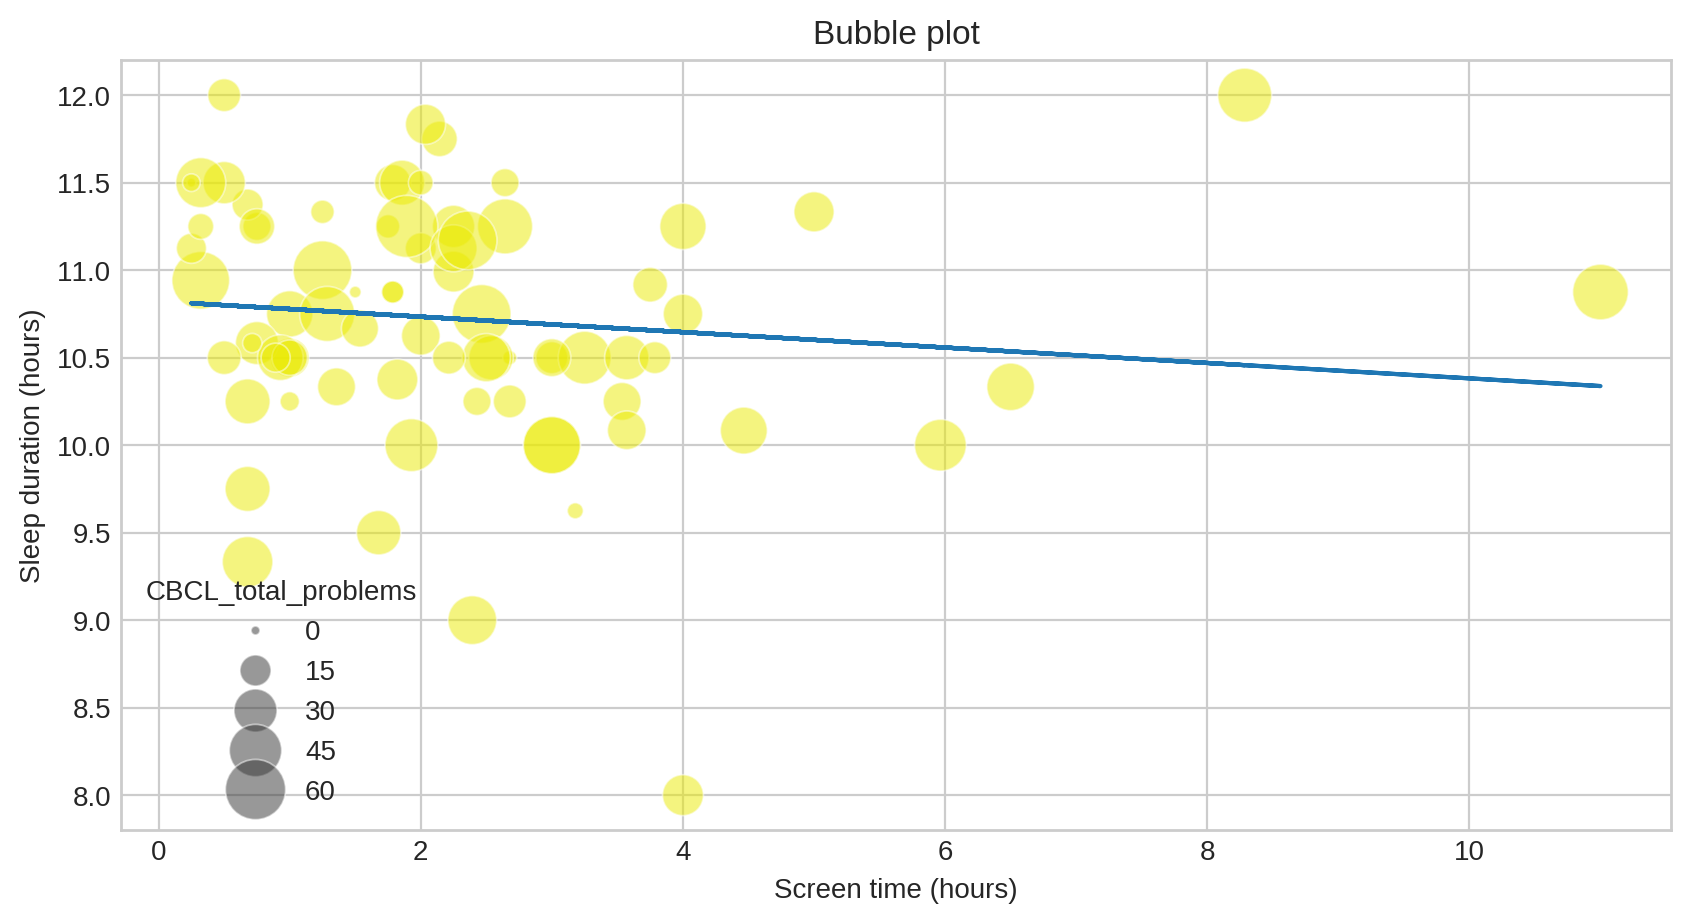

In [8]:
# creating bubble plot for the minimal model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

x = sleep_main['avg_daily_screen_time_hrs']
y_pred = model_fitted.predict(x)

sns.scatterplot(
    data=sleep_main,
    x="avg_daily_screen_time_hrs",
    y="avg_daily_sleep_hrs",
    size="CBCL_total_problems",
    c='#ebeb00',
    alpha=0.5,
    legend=True,
    sizes=(10, 500))
plt.xlabel('Screen time (hours)')
plt.ylabel('Sleep duration (hours)')
plt.title('Bubble plot')
plt.plot(x, y_pred)
plt.show()

The relationship is weak, but nevertheless negative as expected. The legend shows that the amount of total problems is not impacted much by either variable, although in cases of more screen time the value seems to be higher.

In [9]:
# model controlling for age

formula_string2 = "avg_daily_sleep_hrs ~ avg_daily_screen_time_hrs + child_age_yrs"

model2 = sm.formula.ols(formula = formula_string2, data = sleep_main)
model_fitted2 = model2.fit()

print(model_fitted2.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_daily_sleep_hrs   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                 -0.008
Method:                  Least Squares   F-statistic:                    0.6839
Date:                 Tue, 01 Apr 2025   Prob (F-statistic):              0.508
Time:                         14:40:22   Log-Likelihood:                -79.225
No. Observations:                   77   AIC:                             164.4
Df Residuals:                       74   BIC:                             171.5
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept   

In [10]:
# second model for sleep and screen time

formula_string3 = "avg_daily_sleep_hrs ~ avg_daily_screen_time_hrs + avg_daily_film_tv_hrs + avg_daily_youtube_hrs + days_in_week_screen_before_bed"

model3 = sm.formula.ols(formula = formula_string3, data = sleep_main)
model_fitted3 = model3.fit()

print(model_fitted3.summary())

                             OLS Regression Results                            
Dep. Variable:     avg_daily_sleep_hrs   R-squared:                       0.025
Model:                             OLS   Adj. R-squared:                 -0.029
Method:                  Least Squares   F-statistic:                    0.4647
Date:                 Tue, 01 Apr 2025   Prob (F-statistic):              0.761
Time:                         14:40:22   Log-Likelihood:                -78.948
No. Observations:                   77   AIC:                             167.9
Df Residuals:                       72   BIC:                             179.6
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
In

In [11]:
# model for behaviour
formula_string4 = "CBCL_total_problems ~ avg_daily_screen_time_hrs + avg_daily_film_tv_hrs + avg_daily_youtube_hrs + days_in_week_screen_before_bed"

model4 = sm.formula.ols(formula = formula_string4, data = sleep_main)
model_fitted4 = model4.fit()

print(model_fitted4.summary())

                             OLS Regression Results                            
Dep. Variable:     CBCL_total_problems   R-squared:                       0.113
Model:                             OLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     2.293
Date:                 Tue, 01 Apr 2025   Prob (F-statistic):             0.0676
Time:                         14:40:22   Log-Likelihood:                -317.24
No. Observations:                   77   AIC:                             644.5
Df Residuals:                       72   BIC:                             656.2
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
In

All models give very low R-squared values (the last model being the highest, where the variables explain only 11% of the variation in the total problems according to the CBCL questionnaire). Therefore our hypothesis is not clearly explained!

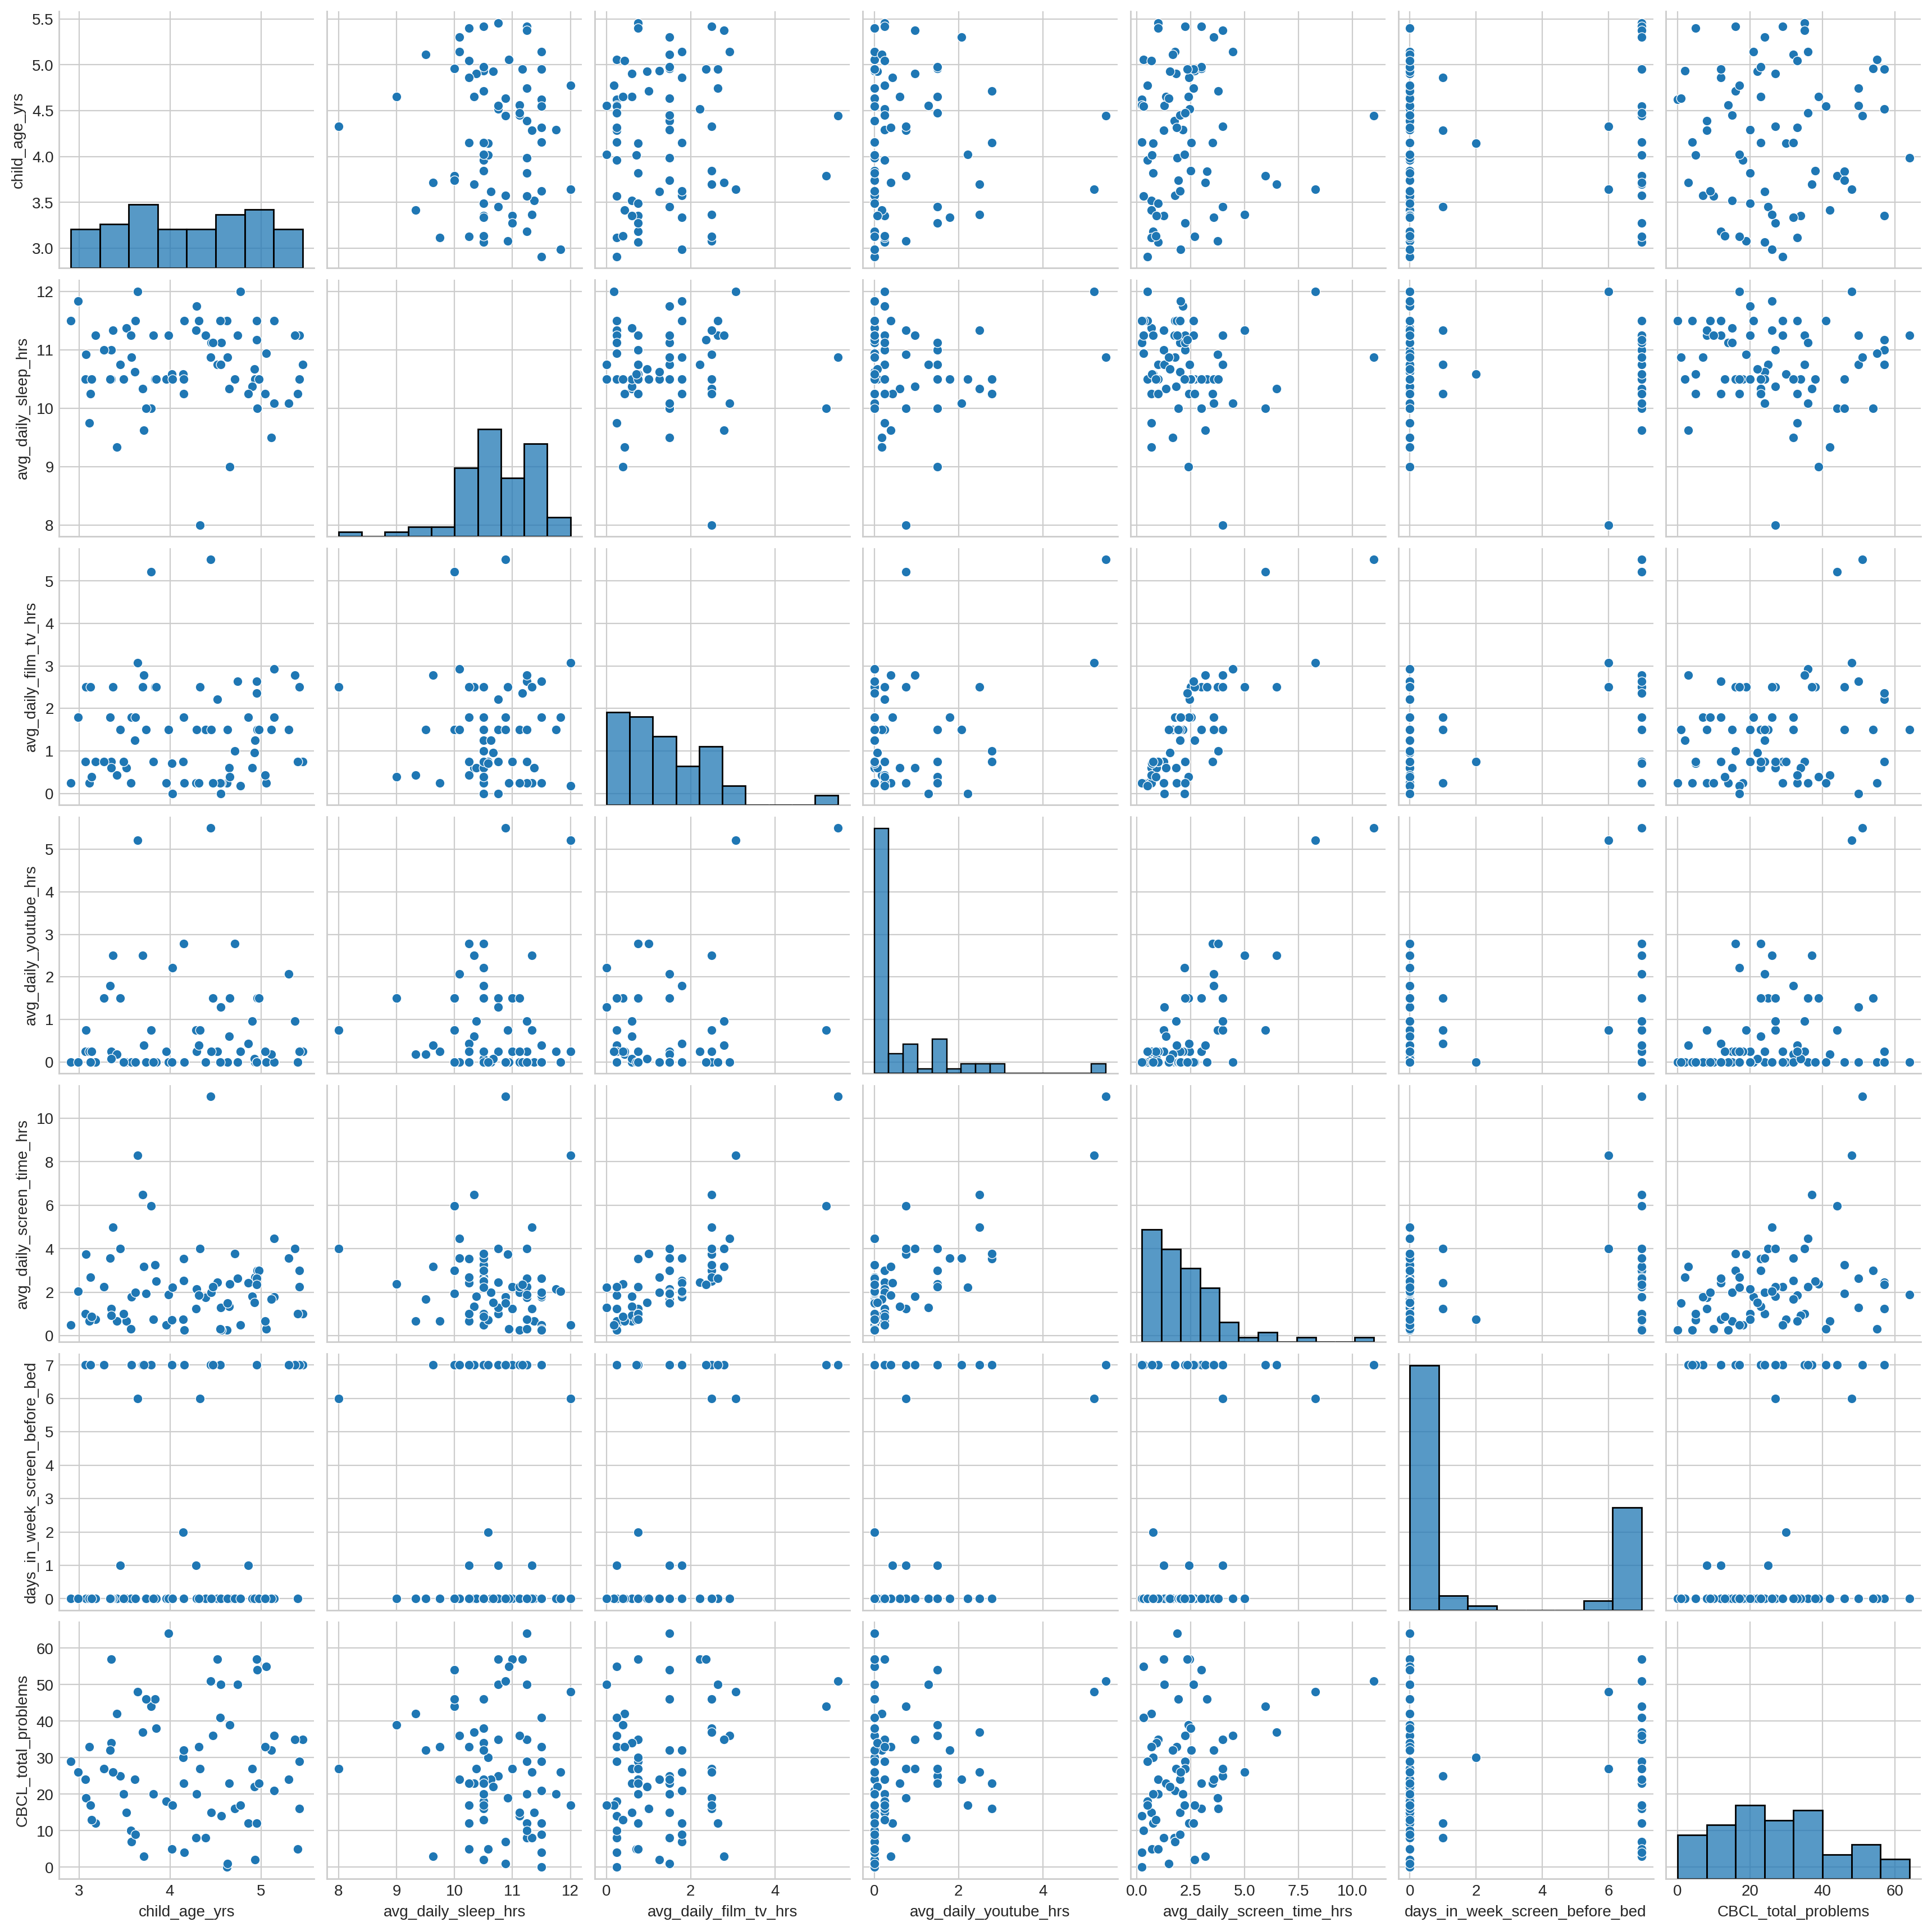

In [12]:
# checking relationships between all variables in pairplot
sns.pairplot(sleep_main.iloc[:,1:8])
plt.show();

It is clear that most variables do not correlate. Many values cluster around a common low or high value, and relationships are not clear.

In [13]:
# minimal model for sleep and screen time before bed
formula_string5 = "days_in_week_screen_before_bed ~ avg_daily_sleep_hrs"

model5 = sm.formula.ols(formula = formula_string5, data = sleep_main)
model_fitted5 = model5.fit()

print(model_fitted5.summary())

                                  OLS Regression Results                                  
Dep. Variable:     days_in_week_screen_before_bed   R-squared:                       0.001
Model:                                        OLS   Adj. R-squared:                 -0.013
Method:                             Least Squares   F-statistic:                   0.05578
Date:                            Tue, 01 Apr 2025   Prob (F-statistic):              0.814
Time:                                    14:40:32   Log-Likelihood:                -197.31
No. Observations:                              77   AIC:                             398.6
Df Residuals:                                  75   BIC:                             403.3
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--

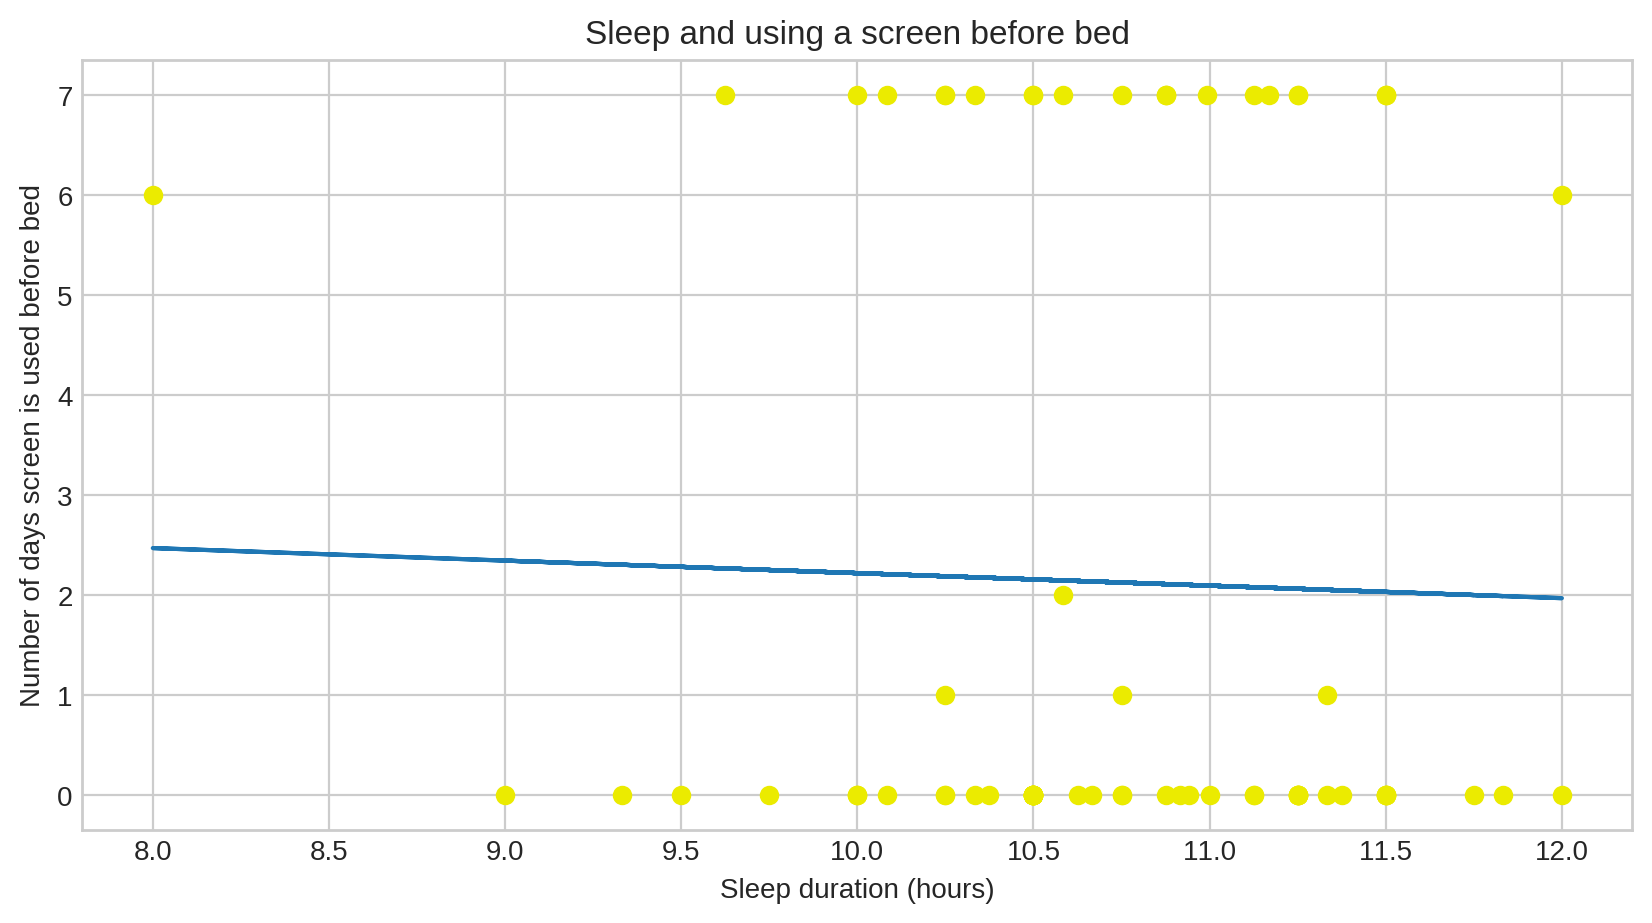

In [14]:
x = sleep_main['avg_daily_sleep_hrs']
y_pred = model_fitted5.predict(x)

plt.scatter(sleep_main['avg_daily_sleep_hrs'], sleep_main['days_in_week_screen_before_bed'], color='#ebeb00')
plt.xlabel('Sleep duration (hours)')
plt.ylabel('Number of days screen is used before bed')
plt.title('Sleep and using a screen before bed')
plt.plot(x, y_pred)
plt.show();

Another very weak relationship - the majority either don't use a screen before bed at all, or use it every single night.

In [15]:
# calculating values for a proportional bar plot
import numpy as np

sleep_mean = sleep_main['avg_daily_sleep_hrs'].mean()

In [16]:
sleep_above_mean = sleep_main[sleep_main['avg_daily_sleep_hrs'] >= sleep_mean]
sleep_below_mean = sleep_main[sleep_main['avg_daily_sleep_hrs'] < sleep_mean]

In [17]:
sleep_above_mean['avg_daily_sleep_hrs'].sum()

np.float64(438.52)

In [18]:
sleep_below_mean['avg_daily_sleep_hrs'].sum()

np.float64(387.12666666666667)

In [19]:
sum1 = sleep_above_mean['avg_daily_film_tv_hrs'].sum()
sum2 = sleep_below_mean['avg_daily_film_tv_hrs'].sum()
sum3 = sleep_above_mean['avg_daily_youtube_hrs'].sum()
sum4 = sleep_below_mean['avg_daily_youtube_hrs'].sum()

In [20]:
# dataframe for amount of sleep and type of screen time
sleep_data = {'film_tv': [sum1, sum2], 'youtube': [sum3, sum4], 'sleep': ['above','below']}
sleep_means = pd.DataFrame(data=sleep_data)
sleep_means.set_index('sleep')

,film_tv,youtube
sleep,,
above,51.928571,23.607143
below,53.178571,26.035714


In [21]:
value1 = sum1/(sum1+sum3)
value2 = sum2/(sum2+sum4)
value3 = sum3/(sum1+sum3)
value4 = sum4/(sum2+sum4)

In [22]:
# converting to proportions
sleep_data2 = {'film_tv': [value1, value2], 'youtube': [value3, value4], 'sleep': ['above','below']}
sleep_means2 = pd.DataFrame(data=sleep_data2)
sleep_means2.set_index('sleep')

,film_tv,youtube
sleep,,
above,0.687470,0.312530
below,0.671326,0.328674


<Axes: title={'center': 'Stacked Bar Graph'}, ylabel='sleep'>

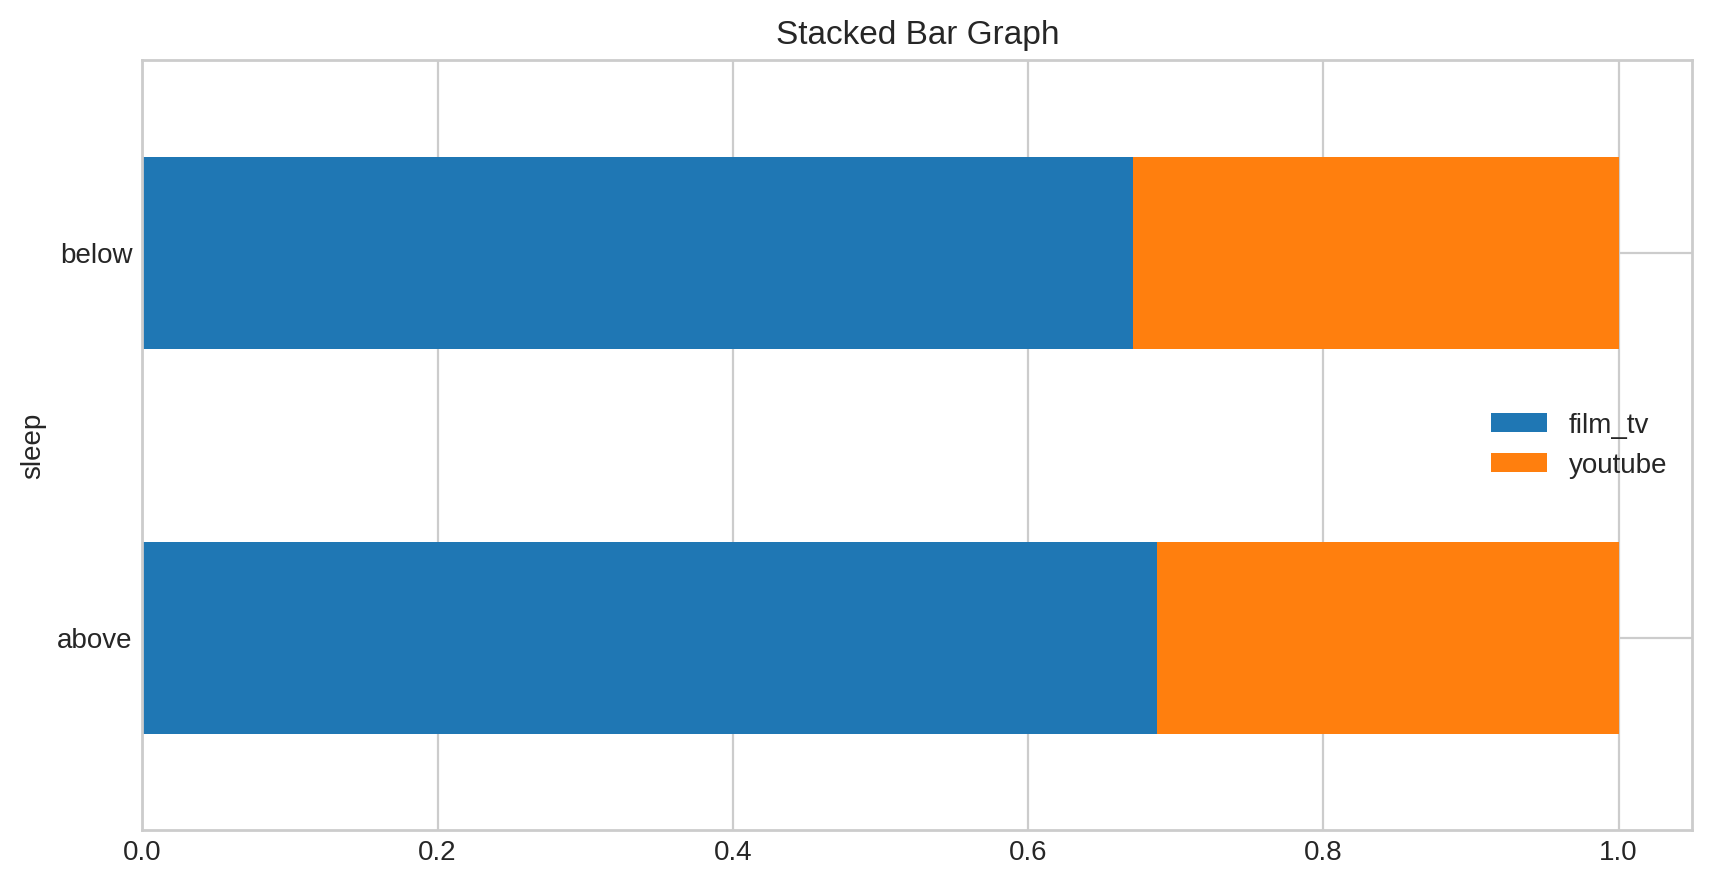

In [23]:
# plotting the graph
sleep_means2.plot( 
    x = 'sleep', 
    kind = 'barh', 
    stacked = True, 
    title = 'Stacked Bar Graph', 
    mark_right = True)

Type of screen usage is not significantly impacted by the amount of sleep the child gets.